In [4]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/dataset_citra_tebu/dtm1k')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.5 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

In [6]:
train_dir = '/content/drive/My Drive/dataset_citra_tebu/dtm1k/train'
test_dir = '/content/drive/My Drive/dataset_citra_tebu/dtm1k/test'

# Preprocessing dan augmentasi data untuk training dan validation
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalisasi gambar
    rotation_range=30,            # Rotasi acak antara 0–30 derajat
    zoom_range=0.2,               # Zoom acak antara 0–20%
    horizontal_flip=True,         # Membalikkan gambar secara horizontal
    validation_split=0.2          # 20% data training digunakan untuk validasi
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi data test

# Load data training dan validasi
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),       # Ukuran gambar input (224x224)
    batch_size=32,                # Ukuran batch
    class_mode='categorical',     # Multi-class classification
    subset='training'             # Data training
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'           # Data validasi
)

# Load data testing
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False                  # Jangan shuffle data test
)


Found 315 images belonging to 4 classes.
Found 77 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi hanya untuk data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% buat validasi
)

# Untuk validasi: tanpa augmentasi, hanya rescale
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Path folder data
data_dir = '/content/drive/My Drive/dataset_citra_tebu/dtm1k/train'  # sesuaikan jika berbeda

# Data training
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Data validasi
val_data = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 315 images belonging to 4 classes.
Found 77 images belonging to 4 classes.


## Bangun Model CNN

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 kelas
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Train Model dgn epoch 5,10,20,30

In [10]:
history_aug = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 119s 12s/step - accuracy: 0.3093 - loss: 2.6697 - val_accuracy: 0.5584 - val_loss: 1.1665
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.5695 - loss: 1.1443 - val_accuracy: 0.5584 - val_loss: 1.2058
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.5407 - loss: 1.1333 - val_accuracy: 0.5584 - val_loss: 1.1423
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.5237 - loss: 1.1052 - val_accuracy: 0.5584 - val_loss: 1.1367
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.5450 - loss: 1.1099 - val_accuracy: 0.5584 - val_loss: 1.0824
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.6041 - loss: 1.0333 - val_accuracy: 0.5584 - val_loss: 1.2456
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.5737 - loss: 1.0363 - val_accuracy: 0.6234 - val_loss: 1.1572
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.5680 - loss: 1.0335 - val_accuracy: 0.5974 - val_los

In [11]:
epoch_list = [5,10]
histories = {}

for ep in epoch_list:
    print(f"\nTraining dengan {ep} epoch...\n")

    history_aug = model.fit(
        train_data,
        epochs=ep,
        validation_data=val_data,
        verbose=1
    )

    histories[f'{ep}_epoch'] = history_aug



Training dengan 5 epoch...

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.6116 - loss: 0.9450 - val_accuracy: 0.6104 - val_loss: 1.0752
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.6556 - loss: 0.9786 - val_accuracy: 0.6494 - val_loss: 1.0441
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.6999 - loss: 0.7988 - val_accuracy: 0.6623 - val_loss: 0.9462
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.6798 - loss: 0.7733 - val_accuracy: 0.6623 - val_loss: 0.8745
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.6561 - loss: 0.8207 - val_accuracy: 0.6753 - val_loss: 0.8287

Training dengan 10 epoch...

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.7138 - loss: 0.7623 - val_accuracy: 0.6494 - val_loss: 0.8987
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.6909 - loss: 0.8720 - val_accuracy: 0.6623 - val_loss: 0.8789
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.

In [12]:
val_loss, val_acc = model.evaluate(val_data)
print(f"\nAkurasi Validasi: {val_acc:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7634 - loss: 0.6688

Akurasi Validasi: 0.6753


In [13]:
model.save("cnn_daun_tebu_augmented.h5")


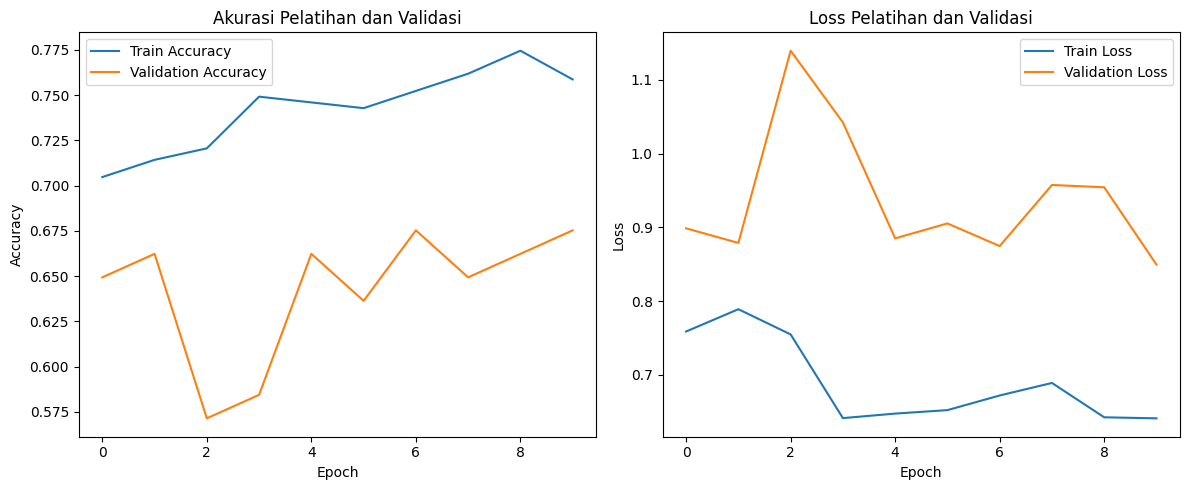

In [14]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


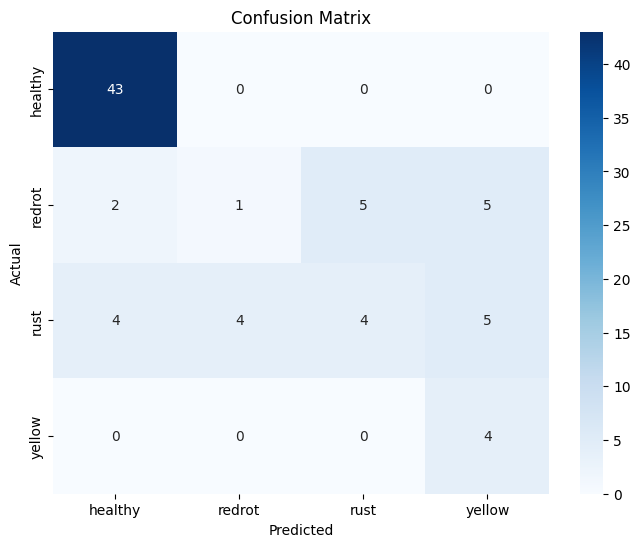

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [16]:
print(classification_report(val_data.classes, y_pred, target_names=class_names))


              precision    recall  f1-score   support

     healthy       0.88      1.00      0.93        43
      redrot       0.20      0.08      0.11        13
        rust       0.44      0.24      0.31        17
      yellow       0.29      1.00      0.44         4

    accuracy                           0.68        77
   macro avg       0.45      0.58      0.45        77
weighted avg       0.64      0.68      0.63        77



## Fine tuning

In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 tanpa top layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Bekukan layer awal (untuk awal fine-tuning)

# Tambahkan classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.4946 - loss: 1.2786 - val_accuracy: 0.6104 - val_loss: 1.0741
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5318 - loss: 1.1380 - val_accuracy: 0.5584 - val_loss: 1.0617
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.6162 - loss: 0.9106 - val_accuracy: 0.6494 - val_loss: 0.9766
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.6384 - loss: 0.9077 - val_accuracy: 0.6623 - val_loss: 0.9537
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.6607 - loss: 0.8461 - val_accuracy: 0.6104 - val_loss: 0.9674
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.6817 - loss: 0.8240 - val_accuracy: 0.6753 - val_loss: 0.9021
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.7045 - loss: 0.7656 - val_accuracy: 0.6883 - val_loss: 0.8691
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.7263 - loss: 0.7055 - val_accuracy: 0.7143 - val_loss:

In [19]:
# Buka beberapa layer terakhir dari base_model
base_model.trainable = True

# Hanya fine-tune layer tertentu (misal: 100 ke atas)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Kompilasi ulang dengan learning rate kecil
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune
fine_tune_history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.6844 - loss: 0.8274 - val_accuracy: 0.7273 - val_loss: 0.8026
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - accuracy: 0.7212 - loss: 0.8195 - val_accuracy: 0.7273 - val_loss: 0.7739
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - accuracy: 0.7588 - loss: 0.6994 - val_accuracy: 0.7403 - val_loss: 0.7453
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - accuracy: 0.7520 - loss: 0.6620 - val_accuracy: 0.7532 - val_loss: 0.7240
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.7545 - loss: 0.6359 - val_accuracy: 0.7662 - val_loss: 0.7042
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.8431 - loss: 0.5270 - val_accuracy: 0.7662 - val_loss: 0.6871
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.8407 - loss: 0.5461 - val_accuracy: 0.7403 - val_loss: 0.6741
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.7934 - loss: 0.5496 - val_accuracy: 0.7403 - val_loss:

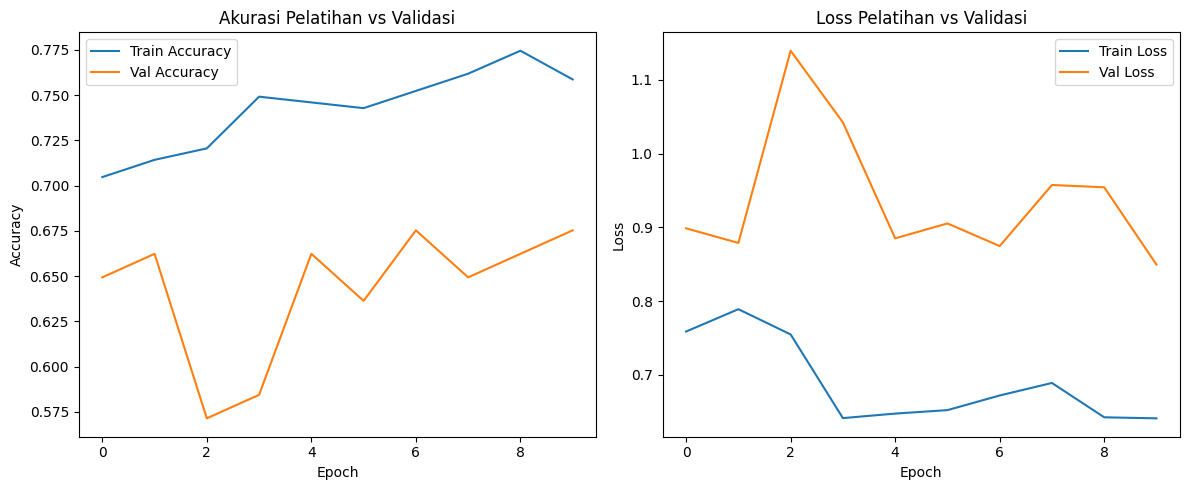

In [20]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
print(classification_report(val_data.classes, y_pred, target_names=class_names))


              precision    recall  f1-score   support

     healthy       0.88      1.00      0.93        43
      redrot       0.20      0.08      0.11        13
        rust       0.44      0.24      0.31        17
      yellow       0.29      1.00      0.44         4

    accuracy                           0.68        77
   macro avg       0.45      0.58      0.45        77
weighted avg       0.64      0.68      0.63        77



3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step


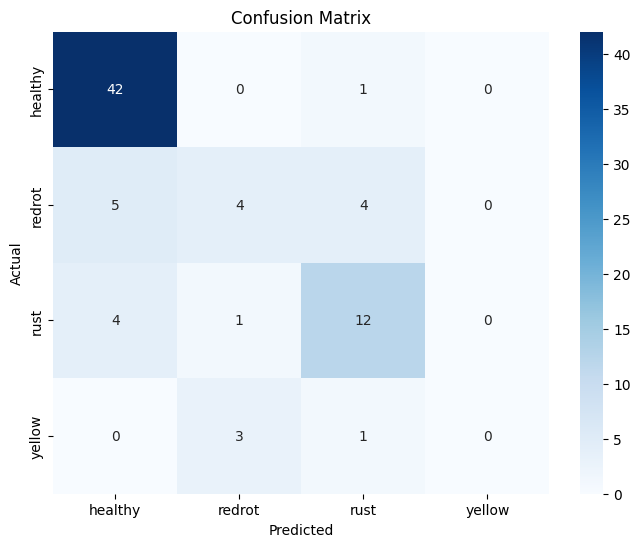

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Augmentasi Fine tuning

In [23]:
history_aug = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.8710 - loss: 0.4336 - val_accuracy: 0.7532 - val_loss: 0.6323
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.8734 - loss: 0.4206 - val_accuracy: 0.7792 - val_loss: 0.6228
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.9037 - loss: 0.3704 - val_accuracy: 0.7922 - val_loss: 0.6138
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.9041 - loss: 0.3719 - val_accuracy: 0.8052 - val_loss: 0.6033
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.8968 - loss: 0.3608 - val_accuracy: 0.7922 - val_loss: 0.5961
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 7s/step - accuracy: 0.8884 - loss: 0.3872 - val_accuracy: 0.7922 - val_loss: 0.5912
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.9241 - loss: 0.3004 - val_accuracy: 0.7922 - val_loss: 0.5867
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.9177 - loss: 0.3103 - val_accuracy: 0.8052 - val_loss:

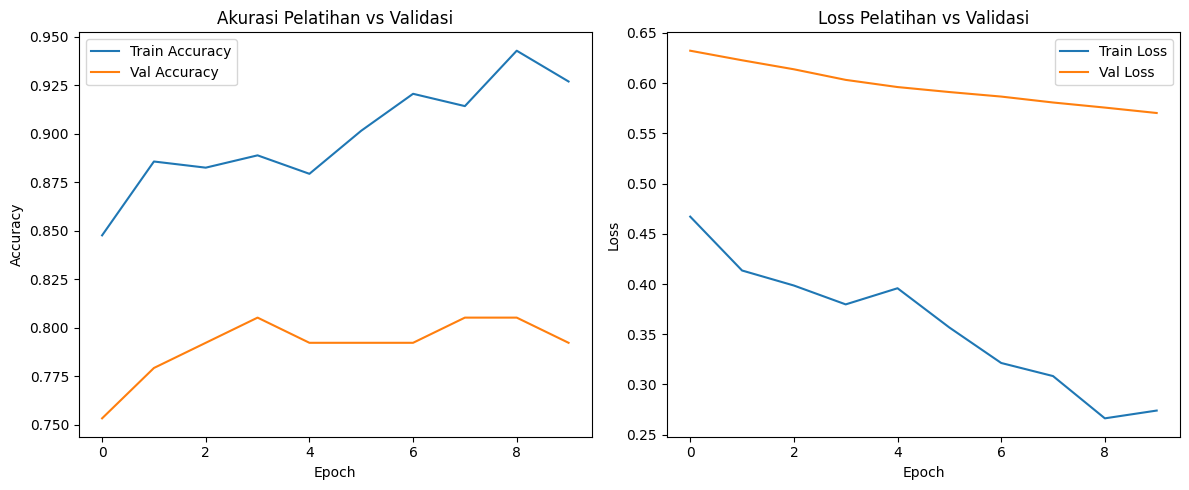

In [24]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step


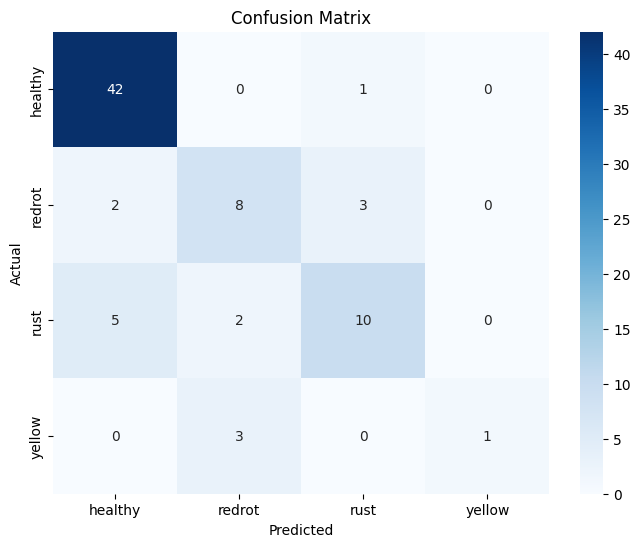

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
print(classification_report(val_data.classes, y_pred, target_names=class_names))


              precision    recall  f1-score   support

     healthy       0.86      0.98      0.91        43
      redrot       0.62      0.62      0.62        13
        rust       0.71      0.59      0.65        17
      yellow       1.00      0.25      0.40         4

    accuracy                           0.79        77
   macro avg       0.80      0.61      0.64        77
weighted avg       0.79      0.79      0.78        77



### Augmentasi data minor

In [28]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

# Konfigurasi
train_dir = '/content/drive/My Drive/dataset_citra_tebu/dtm1k/train'  # ganti dengan path dataset kamu
target_size = (224, 224)     # sesuaikan dengan input CNN kamu
augment_per_image = 3        # berapa banyak variasi dari satu gambar asli

# ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Cek jumlah gambar di tiap kelas
class_counts = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

max_count = max(class_counts.values())

print("Jumlah gambar sebelum augmentasi:")
for k, v in class_counts.items():
    print(f"{k}: {v}")

# Augmentasi kelas yang jumlahnya lebih sedikit dari max_count
for class_name, count in class_counts.items():
    if count >= max_count:
        continue

    input_folder = os.path.join(train_dir, class_name)
    images = [img for img in os.listdir(input_folder) if img.lower().endswith(('.jpg', '.png'))]
    needed = max_count - count
    generated = 0

    print(f"\nMengaugmentasi kelas: {class_name} ({count} → {max_count})")

    i = 0
    while generated < needed:
        img_path = os.path.join(input_folder, images[i % len(images)])
        img = load_img(img_path, target_size=target_size)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        aug_iter = datagen.flow(x, batch_size=1)
        for _ in range(augment_per_image):
            if generated >= needed:
                break
            batch = next(aug_iter)
            aug_name = f"aug_{generated}_{images[i % len(images)]}"
            save_img(os.path.join(input_folder, aug_name), batch[0])
            generated += 1
        i += 1

print("\n✅ Augmentasi selesai.")


Jumlah gambar sebelum augmentasi:
redrot: 65
yellow: 24
healthy: 218
rust: 85

Mengaugmentasi kelas: redrot (65 → 218)

Mengaugmentasi kelas: yellow (24 → 218)

Mengaugmentasi kelas: rust (85 → 218)

✅ Augmentasi selesai.


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/dataset_citra_tebu/dtm1k/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/dataset_citra_tebu/dtm1k/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 700 images belonging to 4 classes.
Found 172 images belonging to 4 classes.


In [31]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.7050 - loss: 0.7363 - val_accuracy: 0.7558 - val_loss: 0.6151
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.8365 - loss: 0.4509 - val_accuracy: 0.8256 - val_loss: 0.4892
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.9006 - loss: 0.3647 - val_accuracy: 0.8663 - val_loss: 0.4185
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.9086 - loss: 0.3049 - val_accuracy: 0.8779 - val_loss: 0.3769
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.9551 - loss: 0.2328 - val_accuracy: 0.8779 - val_loss: 0.3530
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.9635 - loss: 0.2025 - val_accuracy: 0.9070 - val_loss: 0.3232
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.9613 - loss: 0.2002 - val_accuracy: 0.9070 - val_loss: 0.3038
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.9709 - loss: 0.1434 - val_accuracy: 0.9186 - val

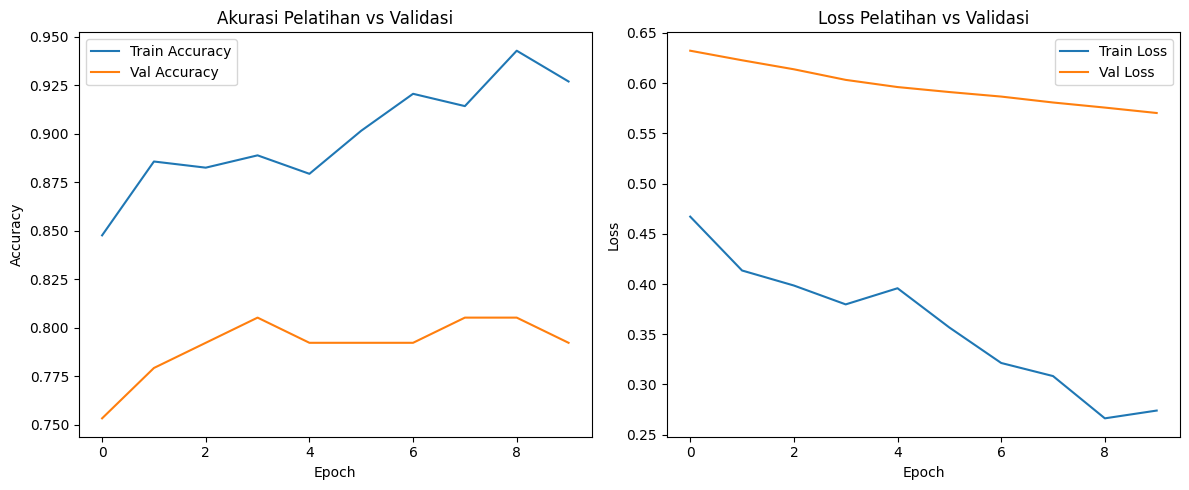

In [32]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Val Loss')
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step


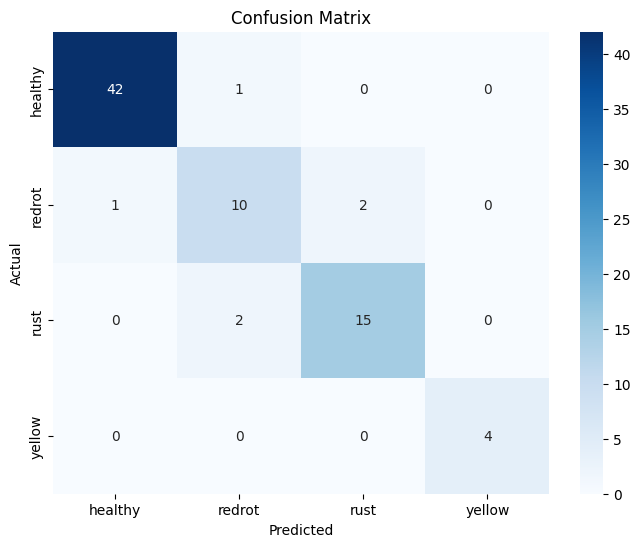

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(val_data.classes, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [34]:
print(classification_report(val_data.classes, y_pred, target_names=class_names))


              precision    recall  f1-score   support

     healthy       0.98      0.98      0.98        43
      redrot       0.77      0.77      0.77        13
        rust       0.88      0.88      0.88        17
      yellow       1.00      1.00      1.00         4

    accuracy                           0.92        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.92      0.92      0.92        77

